In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
file_path = '/content/universal_top_spotify_songs.csv'
df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
               spotify_id                  name                artists  \
0  2plbrEY59IikOBgBGLjaoe      Die With A Smile  Lady Gaga, Bruno Mars   
1  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER          Billie Eilish   
2  5N3hjp1WNayUPZrA8kJmJP  Please Please Please      Sabrina Carpenter   
3  2qSkIjg1o9h3YT9RAgYN75              Espresso      Sabrina Carpenter   
4  7tI8dRuH2Yc6RuoTjxo4dU                   Who                  Jimin   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1                9     NaN    24-08-2024   
1           2              -1               -1     NaN    24-08-2024   
2           3               1                2     NaN    24-08-2024   
3           4               1               -1     NaN    24-08-2024   
4           5              -2               -3     NaN    24-08-2024   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0         

In [ ]:
print("Initial Data Overview:")
print(df.head())
print("\nData Types and Missing Values:")
print(df.info())
print("\nMissing Values in each column:")
print(df.isnull().sum())

if 'snapshot_date' in df.columns:
    df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

df = df.drop_duplicates()

if 'country' in df.columns:
    missing_values_country = df['country'].isnull().sum()
    print(f"\nNumber of missing values in 'country' column: {missing_values_country}")
    if missing_values_country > 0:
        df['country'] = df['country'].fillna('Unknown')

essential_columns = ['popularity', 'snapshot_date']  # Replace with actual essential columns
df = df.dropna(subset=essential_columns)

print("\nData Types after Cleaning:")
print(df.info())

df = df.dropna()

print("\nCleaned Data Overview:")
print(df.head())
print("\nData Types and Missing Values after Cleaning:")
print(df.info())
print("\nMissing Values in each column after Cleaning:")
print(df.isnull().sum())

Initial Data Overview:
               spotify_id                  name                artists  \
0  2plbrEY59IikOBgBGLjaoe      Die With A Smile  Lady Gaga, Bruno Mars   
1  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER          Billie Eilish   
2  5N3hjp1WNayUPZrA8kJmJP  Please Please Please      Sabrina Carpenter   
3  2qSkIjg1o9h3YT9RAgYN75              Espresso      Sabrina Carpenter   
4  7tI8dRuH2Yc6RuoTjxo4dU                   Who                  Jimin   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1                9     NaN    24-08-2024   
1           2              -1               -1     NaN    24-08-2024   
2           3               1                2     NaN    24-08-2024   
3           4               1               -1     NaN    24-08-2024   
4           5              -2               -3     NaN    24-08-2024   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          89     

<ipython-input-39-fb8d98423473>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])



Number of missing values in 'country' column: 14255

Data Types after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   spotify_id          1048575 non-null  object        
 1   name                1048549 non-null  object        
 2   artists             1048549 non-null  object        
 3   daily_rank          1048575 non-null  int64         
 4   daily_movement      1048575 non-null  int64         
 5   weekly_movement     1048575 non-null  int64         
 6   country             1048575 non-null  object        
 7   snapshot_date       1048575 non-null  datetime64[ns]
 8   popularity          1048575 non-null  int64         
 9   is_explicit         1048575 non-null  bool          
 10  duration_ms         1048575 non-null  int64         
 11  album_name          1047985 non-null  object   

In [ ]:
# Example: Extract year and month from 'snapshot_date'
if 'snapshot_date' in df.columns:
    df['year'] = df['snapshot_date'].dt.year
    df['month'] = df['snapshot_date'].dt.month

In [ ]:
print("Basic Statistics:")
print(df.describe(include='all'))

Basic Statistics:
                    spotify_id              name       artists    daily_rank  \
count                  1047985           1047985       1047985  1.047985e+06   
unique                   13536             12330          8311           NaN   
top     3rUGC1vUpkDG9CZFHMur1t  Beautiful Things  Taylor Swift           NaN   
freq                      7508              7704         14120           NaN   
mean                       NaN               NaN           NaN  2.548357e+01   
min                        NaN               NaN           NaN  1.000000e+00   
25%                        NaN               NaN           NaN  1.300000e+01   
50%                        NaN               NaN           NaN  2.500000e+01   
75%                        NaN               NaN           NaN  3.800000e+01   
max                        NaN               NaN           NaN  5.000000e+01   
std                        NaN               NaN           NaN  1.442785e+01   

        daily_movemen

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 223234.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 211896.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for high danceability: W=0.9261087817922917, p-value=2.4828491240570153e-120
Shapiro-Wilk test for low danceability: W=0.9060646269002981, p-value=2.855067732824289e-126
The high danceability group does not follow a normal distribution.
The low danceability group does not follow a normal distribution.
Levene's test for equal variances: W=102.3220056511409, p-value=4.748230649711409e-24
The variances are significantly different (reject equal variance assumption).
Independent t-test results: t-statistic=-6.409438933242533, p-value=1.4620480286331444e-10
Reject the null hypothesis: There is a significant difference in the mean popularity between high and low danceability songs.


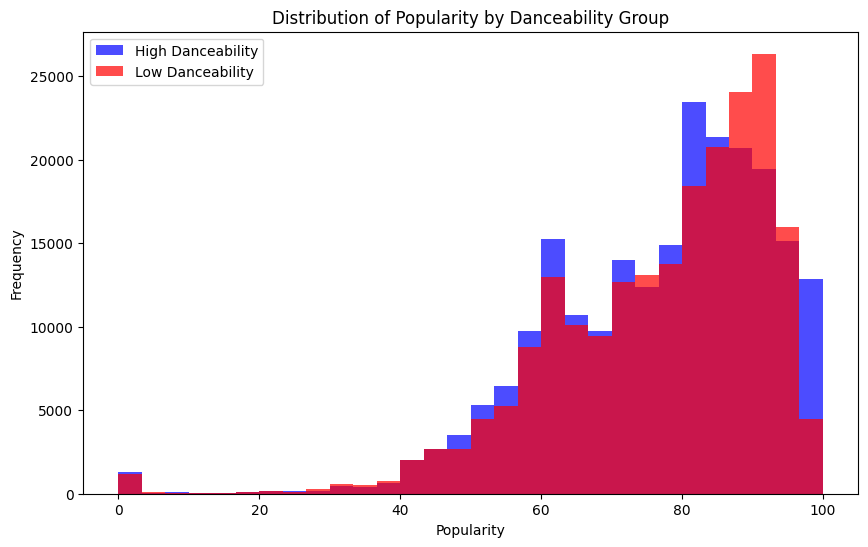

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, levene, shapiro
import matplotlib.pyplot as plt

# Step 1: Categorize songs based on danceability using the median
median_danceability = df['danceability'].median()
df['danceability_group'] = np.where(df['danceability'] >= median_danceability, 'high', 'low')

# Step 2: Separate the data into high and low danceability groups
high_danceability = df[df['danceability_group'] == 'high']['popularity']
low_danceability = df[df['danceability_group'] == 'low']['popularity']

# Step 3: Check for normality using the Shapiro-Wilk test
shapiro_high = shapiro(high_danceability)
shapiro_low = shapiro(low_danceability)

print(f"Shapiro-Wilk test for high danceability: W={shapiro_high[0]}, p-value={shapiro_high[1]}")
print(f"Shapiro-Wilk test for low danceability: W={shapiro_low[0]}, p-value={shapiro_low[1]}")

# Interpret normality test results
if shapiro_high[1] < 0.05:
    print("The high danceability group does not follow a normal distribution.")
else:
    print("The high danceability group follows a normal distribution.")

if shapiro_low[1] < 0.05:
    print("The low danceability group does not follow a normal distribution.")
else:
    print("The low danceability group follows a normal distribution.")

# Step 4: Check for equal variances using Levene's test
levene_test = levene(high_danceability, low_danceability)
print(f"Levene's test for equal variances: W={levene_test[0]}, p-value={levene_test[1]}")

# Interpret Levene's test result
if levene_test[1] < 0.05:
    print("The variances are significantly different (reject equal variance assumption).")
    equal_var = False
else:
    print("The variances are not significantly different (fail to reject equal variance assumption).")
    equal_var = True

# Step 5: Perform an independent t-test
t_stat, p_val = ttest_ind(high_danceability, low_danceability, equal_var=equal_var)
print(f"Independent t-test results: t-statistic={t_stat}, p-value={p_val}")

# Step 6: Interpret the t-test results
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean popularity between high and low danceability songs.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean popularity between high and low danceability songs.")

# Step 7: Visualize the distribution of popularity in both groups
plt.figure(figsize=(10, 6))
plt.hist(high_danceability, bins=30, alpha=0.7, color='blue', label='High Danceability')
plt.hist(low_danceability, bins=30, alpha=0.7, color='red', label='Low Danceability')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity by Danceability Group')
plt.legend()
plt.show()


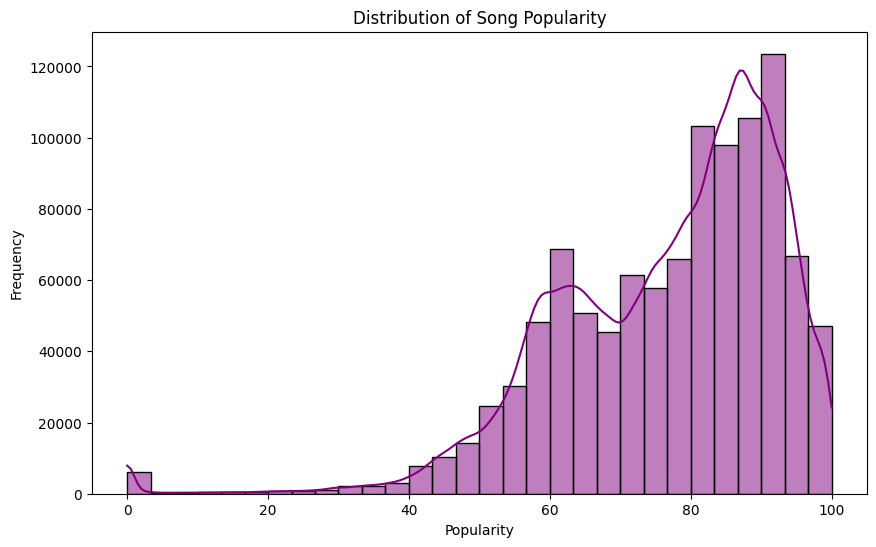

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30, color='purple')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

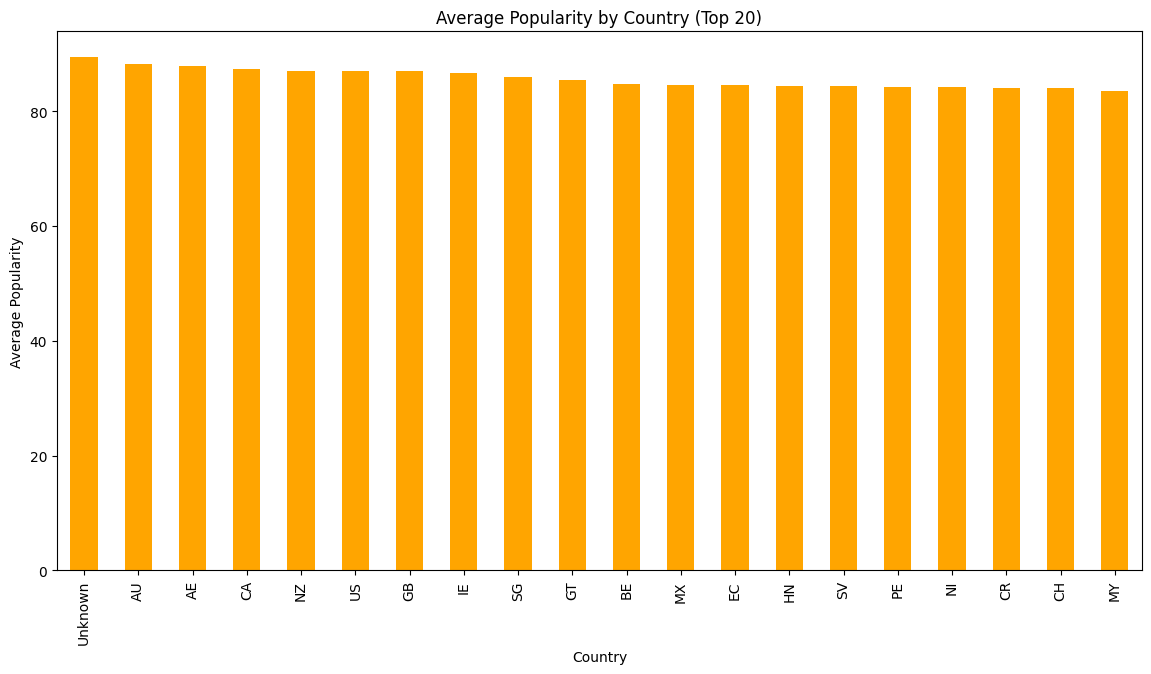

In [ ]:
plt.figure(figsize=(14, 7))
df_country_popularity = df.groupby('country')['popularity'].mean().sort_values(ascending=False).head(20)
df_country_popularity.plot(kind='bar', color='orange')
plt.title('Average Popularity by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

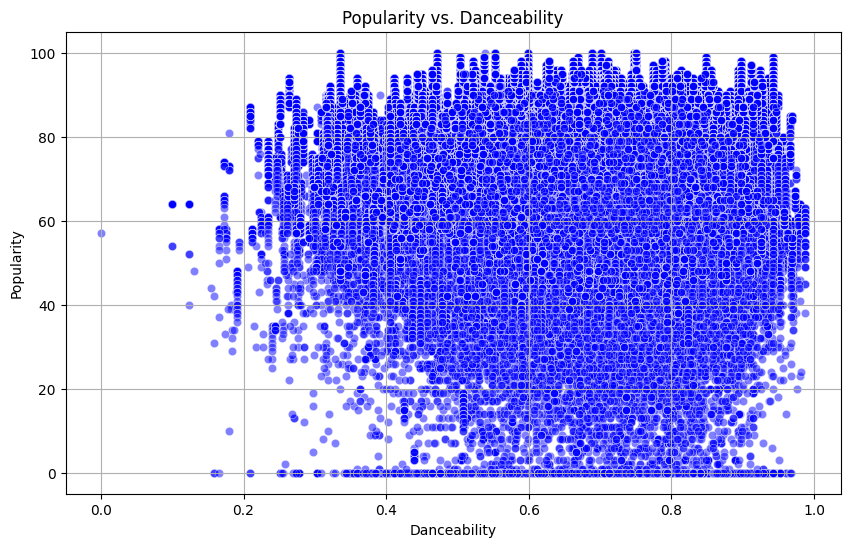

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.5, color='blue')
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

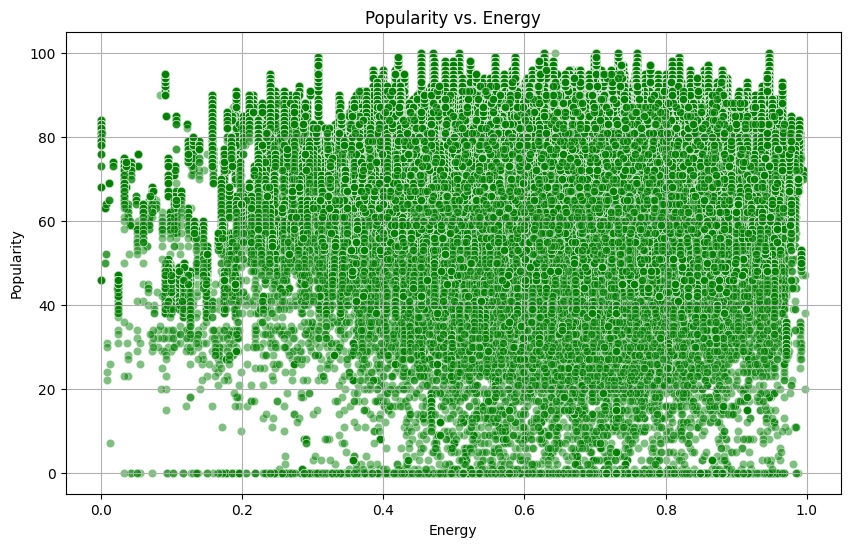

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=df, alpha=0.5, color='green')
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

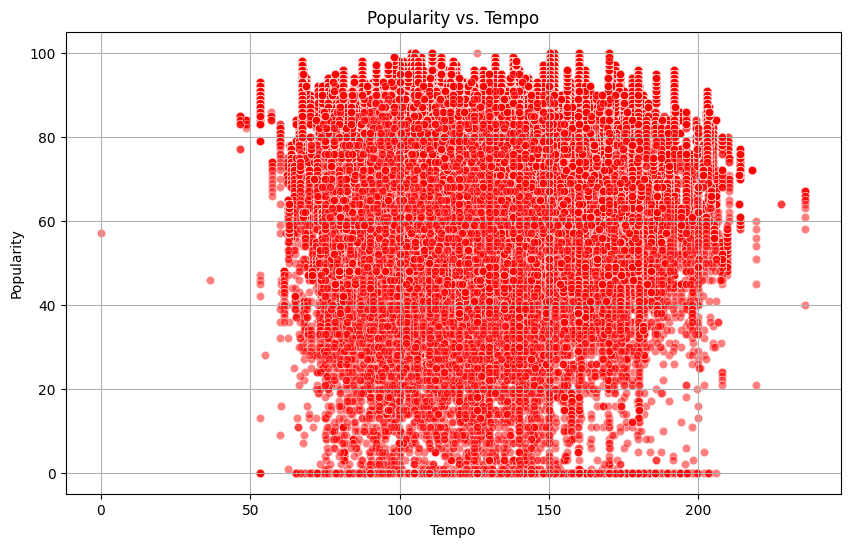

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=df, alpha=0.5, color='red')
plt.title('Popularity vs. Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

<Figure size 1200x1000 with 0 Axes>

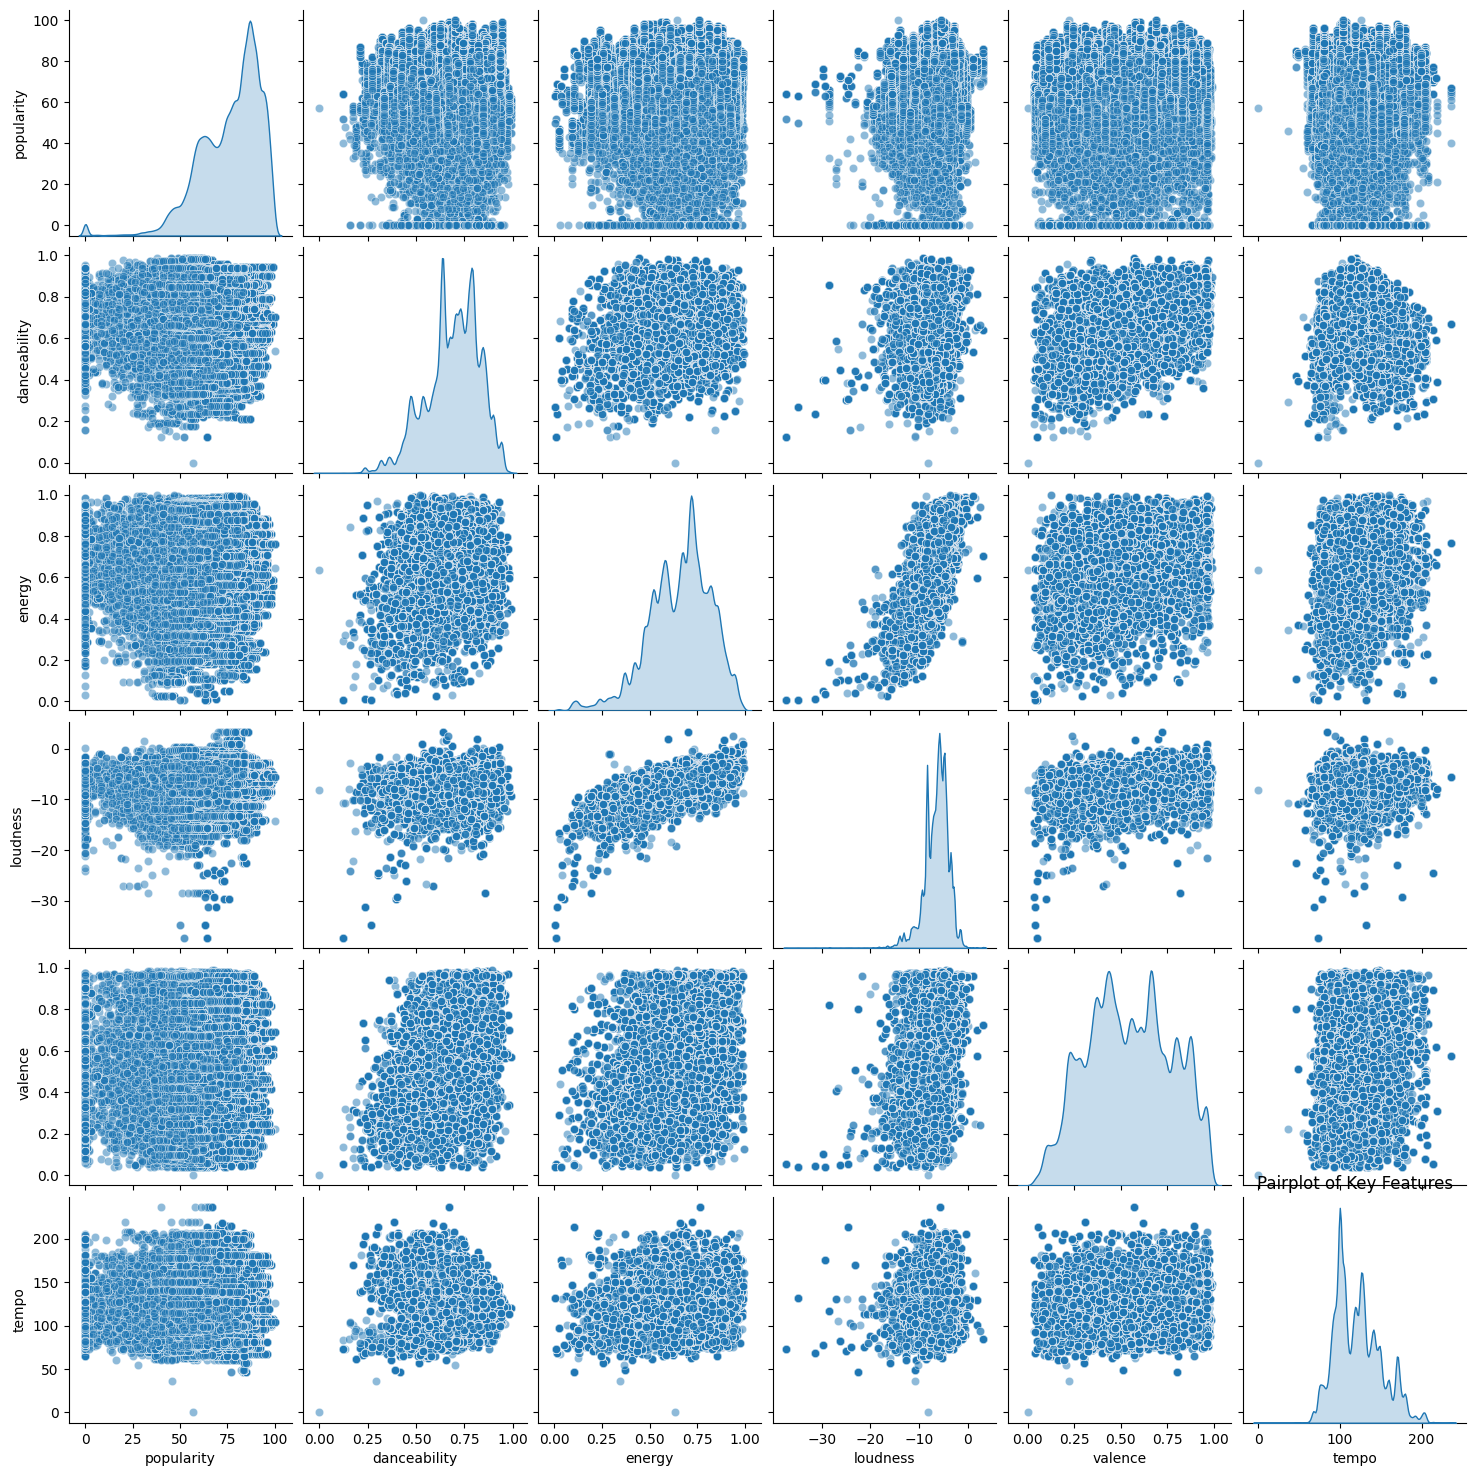

In [ ]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo']
plt.figure(figsize=(12, 10))
sns.pairplot(df[features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.title('Pairplot of Key Features')
plt.show()

<ipython-input-48-e33c01eb7ec2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='popularity', data=df, palette='Set2')


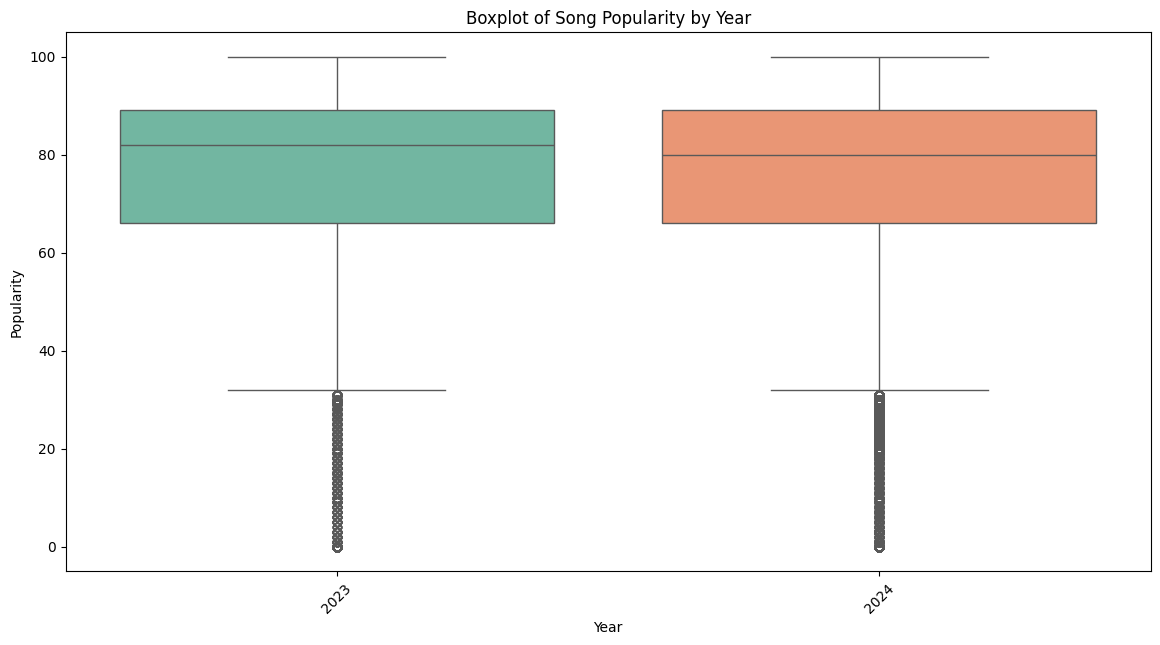

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='popularity', data=df, palette='Set2')
plt.title('Boxplot of Song Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()


<ipython-input-49-5ef5017b2a4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='popularity', data=df, palette='Set1')


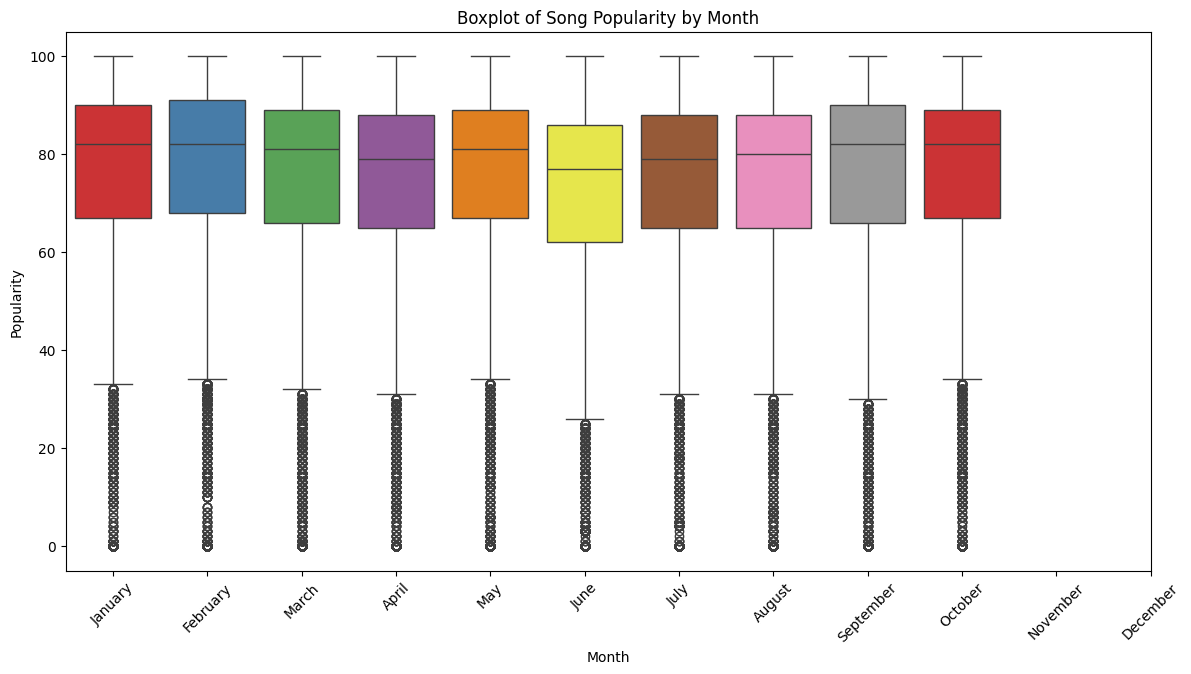

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='popularity', data=df, palette='Set1')
plt.title('Boxplot of Song Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.xticks(range(12), [datetime(2000, i+1, 1).strftime('%B') for i in range(12)], rotation=45)
plt.show()

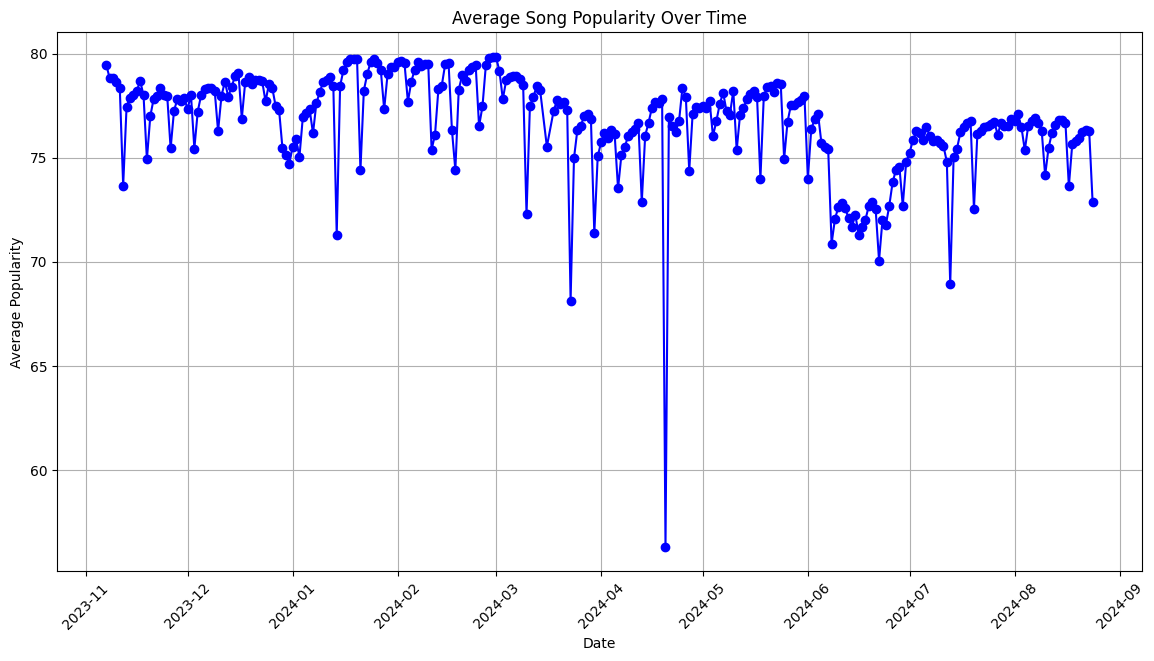

In [ ]:
popularity_trend = df.groupby('snapshot_date')['popularity'].mean().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(popularity_trend['snapshot_date'], popularity_trend['popularity'], marker='o', color='b')
plt.title('Average Song Popularity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

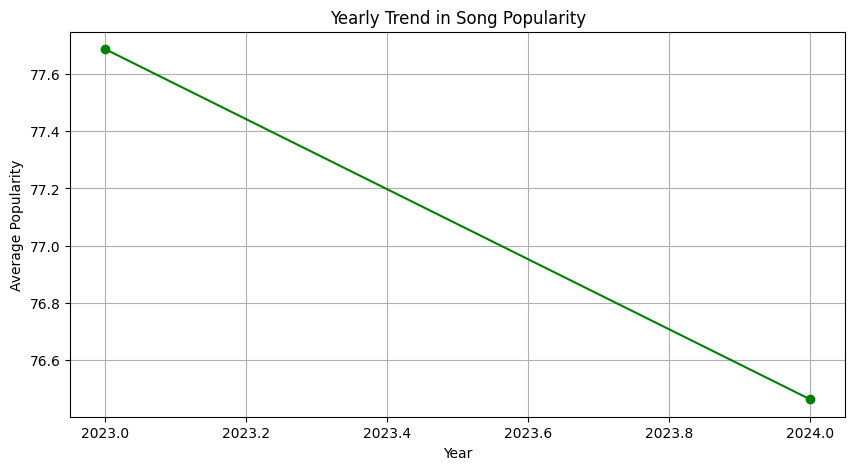

In [ ]:
yearly_trend = df.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_trend['year'], yearly_trend['popularity'], marker='o', linestyle='-', color='g')
plt.title('Yearly Trend in Song Popularity')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

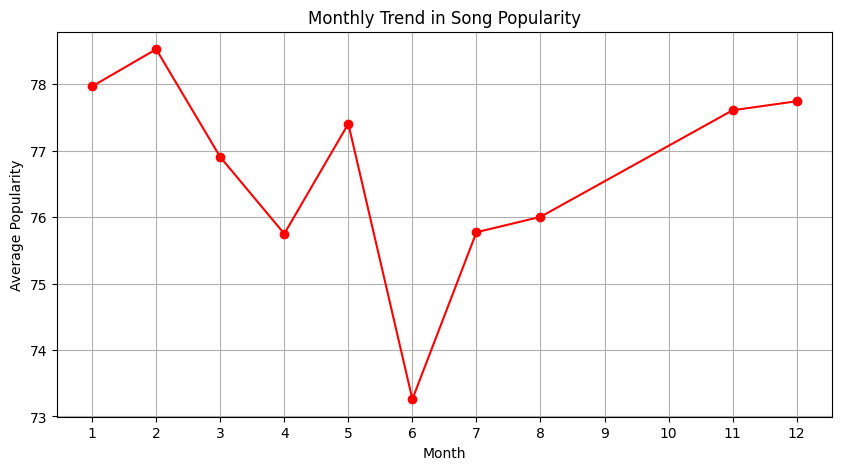

In [ ]:
monthly_trend = df.groupby('month')['popularity'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend['month'], monthly_trend['popularity'], marker='o', linestyle='-', color='r')
plt.title('Monthly Trend in Song Popularity')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

In [ ]:
import pandas as pd

# Load your DataFrame (replace this with your actual DataFrame loading code)
# df = pd.read_csv('your_data_file.csv')

# Print column names to inspect
print("Columns in the DataFrame:", df.columns)

# Check for leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Print column names again after stripping
print("Columns after stripping spaces:", df.columns)

# Make sure 'snapshot_date' is in the columns
if 'snapshot_date' in df.columns:
    # Set 'snapshot_date' as the index and sort
    df.set_index('snapshot_date', inplace=True)
    df = df.sort_index()
else:
    print("'snapshot_date' column not found in DataFrame.")
    # Check for similar column names
    similar_columns = [col for col in df.columns if 'date' in col.lower()]
    print("Similar column names:", similar_columns)


Columns in the DataFrame: Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'year', 'month'],
      dtype='object')
Columns after stripping spaces: Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'year', 'month'],
      dtype='object')


Number of observations: 1500


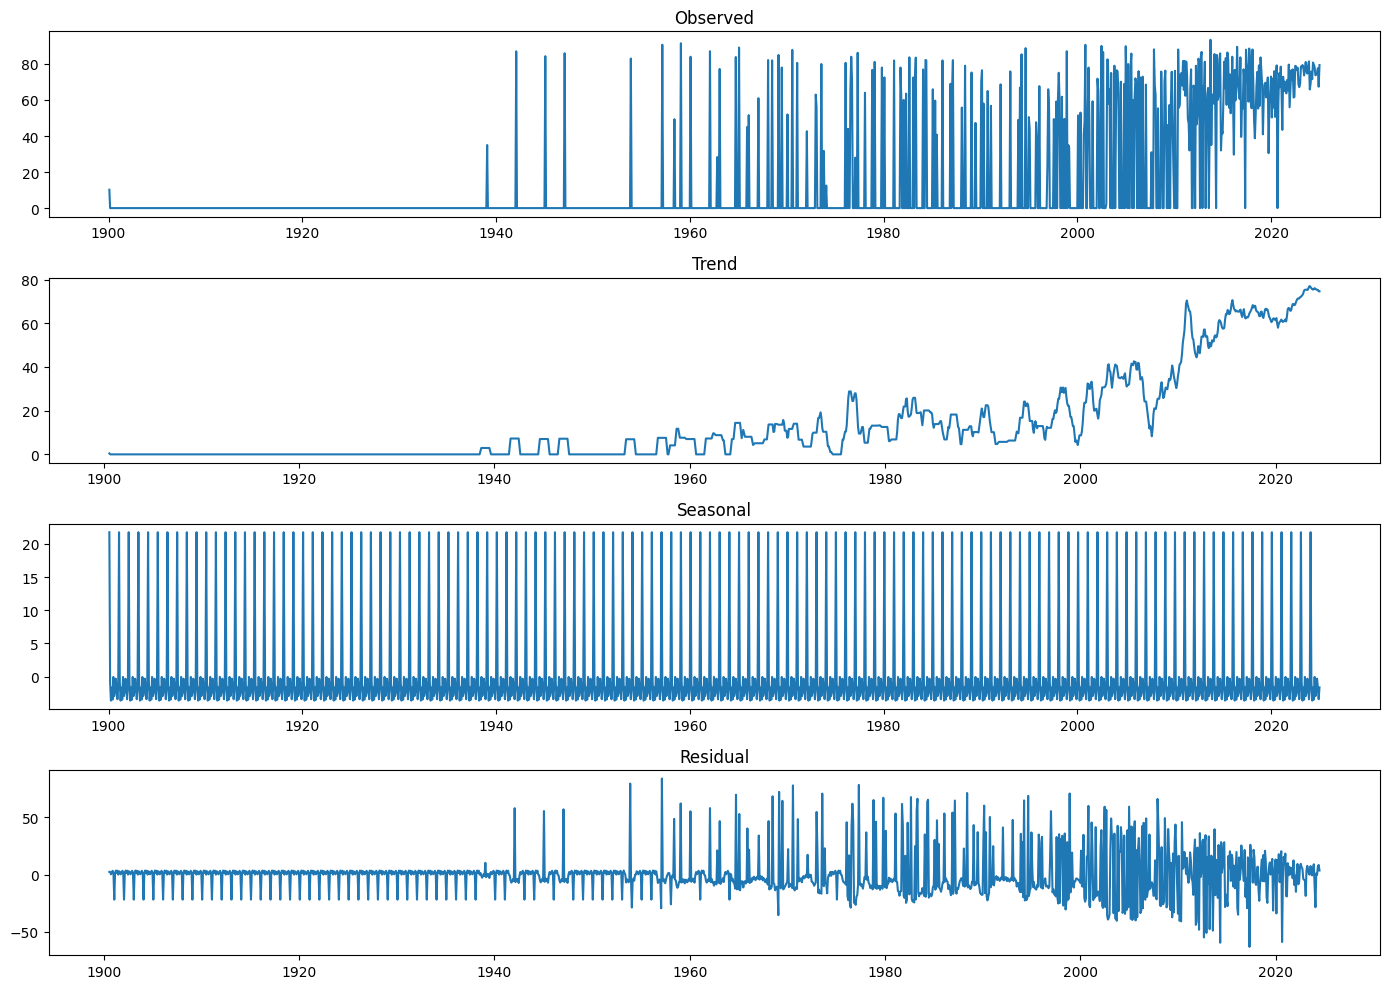

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

df = df.dropna(subset=['album_release_date'])

df.set_index('album_release_date', inplace=True)
df = df.sort_index()

data_resampled = df['popularity'].resample('M').mean().fillna(0)

print(f"Number of observations: {len(data_resampled)}")

if len(data_resampled) < 24:
    plt.figure(figsize=(14, 6))
    plt.plot(data_resampled, label='Monthly Average Popularity')
    plt.title('Monthly Average Popularity')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    result = seasonal_decompose(data_resampled, model='additive')

    plt.figure(figsize=(14, 10))
    plt.subplot(4, 1, 1)
    plt.plot(result.observed)
    plt.title('Observed')

    plt.subplot(4, 1, 2)
    plt.plot(result.trend)
    plt.title('Trend')

    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal)
    plt.title('Seasonal')

    plt.subplot(4, 1, 4)
    plt.plot(result.resid)
    plt.title('Residual')

    plt.tight_layout()
    plt.show()


Linear Regression - Mean Squared Error: 242.20
Linear Regression - R^2 Score: 0.03
Decision Tree Regressor - Mean Squared Error: 46.27
Decision Tree Regressor - R^2 Score: 0.81


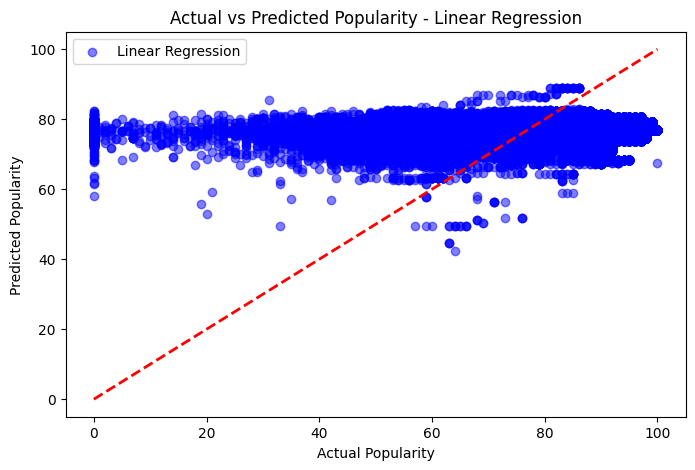

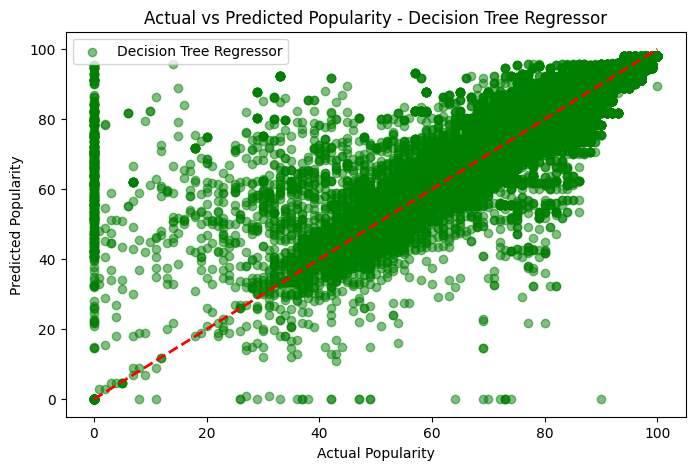

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = df.dropna(subset=['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo'])

features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

# Model 2: Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled)

# Step 6: Evaluate the Models

# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - Mean Squared Error: {mse_lr:.2f}')
print(f'Linear Regression - R^2 Score: {r2_lr:.2f}')

# Decision Tree Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regressor - Mean Squared Error: {mse_dt:.2f}')
print(f'Decision Tree Regressor - R^2 Score: {r2_dt:.2f}')

# Step 7: Visualize the Results

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Popularity - Linear Regression')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.show()

# Plot actual vs. predicted values for Decision Tree Regressor
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='green', label='Decision Tree Regressor')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Popularity - Decision Tree Regressor')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.show()

# Step 8: Insights
# - Discuss which model performs better and why.
# - Identify which features have the most impact on song popularity.
